In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

In [2]:
df=pd.read_csv('E:\candy-data.csv')

### Exploring the data

In [3]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
df.shape

(85, 13)

### Very clean but we can fix the object type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


## And the name too ,                                                                                                                         a lot better now " 

In [6]:
df=df.rename(columns={'competitorname':'candy_name'})

In [7]:
df['candy_name']=df['candy_name'].astype('category')

## Now let's sort the candies by the winning percentage 

In [8]:
ddf=df.sort_values('winpercent',ascending=False).reset_index()
ddf=ddf.drop(columns='index')

## The best 10 here and we notice that ReeseÕs is very lucky that has 4 records !
### We will go to that later

In [9]:
ddf.head(10)

,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
1,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
2,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
4,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
5,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
6,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
7,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
8,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
9,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


### Here are the worst 10 and 'Nik L Nip' has about the most price percentage and it's the last one so may be the price has effect !

In [10]:
ddf.tail(10)

,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
75,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958
76,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
77,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
78,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
79,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
80,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
81,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
82,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
83,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
84,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341


## Let's see all candies with the same ingredients as the last one may be this is the reason of the price
### okay, it's not .There are different prices for the same ingredients and even different sugar percentage so nothing obvious

In [11]:
ddf[ddf['chocolate']==0][ddf['fruity']==1][ddf['caramel']==0][ddf['peanutyalmondy']==0][ddf['nougat']==0][ddf['crispedricewafer']==0][ddf['hard']==0][ddf['bar']==0][ddf['pluribus']==1]

C:\Users\7egab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
12,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628
18,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
21,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
25,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.119740
30,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
32,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,54.861111
35,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947
37,Haribo Sour Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,51.412430
43,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313,0.255,47.173229
45,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716


### Here are the most expensive 5 and the win percentage still differs a lot

In [12]:
ddf.nlargest(5,'pricepercent')

,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
67,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188
84,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
71,Ring pop,0,1,0,0,0,0,1,0,0,0.732,0.965,35.290756
19,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481
23,HersheyÕs Special Dark,1,0,0,0,0,0,0,1,0,0.430,0.918,59.236122


### The most sweety candies still the winning percentage not correlated with the naked eye and even the price

In [13]:
ddf.nlargest(5,'sugarpercent')

,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
7,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
17,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
76,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
18,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
30,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695


## Now let's search for candies with the magic ingredients of the first one 
### Okay no one makes this magic ingredients except him and we notice that every acndy has a different sugar percentage and different prices so he really covers a lot of tastes , he is clever

In [14]:
ddf[ddf['chocolate']==1][ddf['fruity']==0][ddf['caramel']==0][ddf['peanutyalmondy']==1][ddf['nougat']==0][ddf['crispedricewafer']==0][ddf['hard']==0][ddf['bar']==0][ddf['pluribus']==0]

C:\Users\7egab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
1,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
7,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901


## Here are the ingredients percentages of chocolate and non chocolate candies

In [15]:
ddf.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.770833,0.083333,0.041667,0.020833,0.000000,0.291667,0.020833,0.666667,0.452937,0.343021,42.142257
1,0.027027,0.270270,0.324324,0.162162,0.189189,0.027027,0.540541,0.324324,0.512000,0.632162,60.921529


## Now let's see if price and winning have any correlation
### not even close !

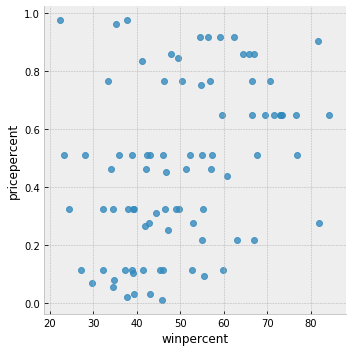

In [16]:
sns.lmplot(y='pricepercent',x='winpercent',data=ddf,fit_reg=False)

### And sugar percentage has no correlation ,neither

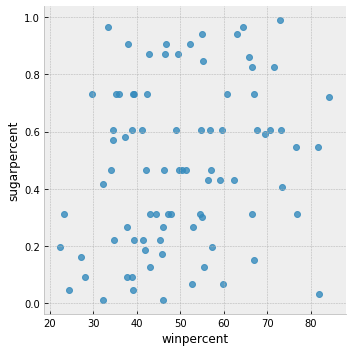

In [17]:
sns.lmplot(y='sugarpercent',x='winpercent',data=ddf,fit_reg=False)

# The data not showing a lot may be calories have a role in the winning and price percentage !

## Let's take off the curtain of the best ingrediants that will ensure you will make a good candy 
### chocolate is essential "

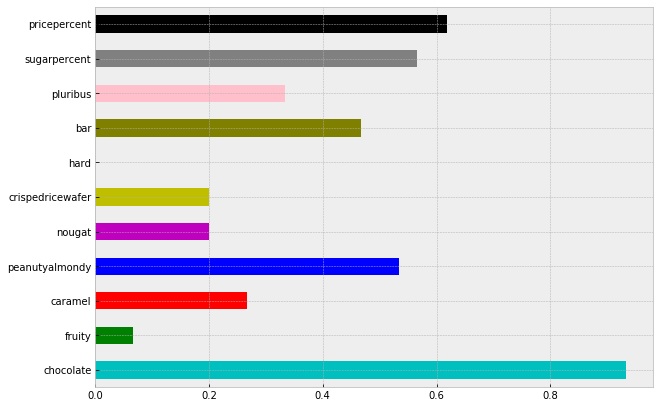

In [18]:
ddf.iloc[:,:-1].head(15).mean().plot(kind='barh',figsize=(10,7),
                                     color=['c', 'g', 'r', 'b', 'm', 'y', 'w', 'olive','pink','gray','k'])

### There may be a negative corr between chocolate and fruity

In [19]:
pd.crosstab(ddf['chocolate'],ddf['fruity'])

fruity,0,1
chocolate,,
0,11,37
1,36,1


## Let's see some insights about having chocolate and winning
### It seems that a lot of candies don't have chocolate ,although it has a more winning percentage 

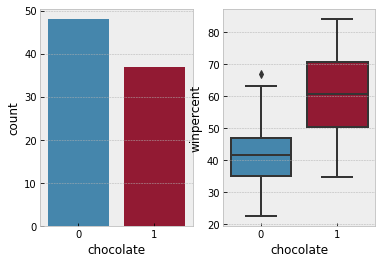

In [20]:
fig, ax =plt.subplots(1,2)
sns.countplot(ddf.chocolate, ax=ax[0])
sns.boxplot(x='chocolate',y='winpercent',data=ddf, ax=ax[1])
plt.show()

### But two of non-chocolate candies have a good winning % with different sugar again and from this data we can't know the reason honstly

In [21]:
ddf[ddf['chocolate']==0][ddf['winpercent']>60]

C:\Users\7egab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
12,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.22,67.037628
18,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.22,63.085140


### lots of candies don't have peanuts ,although it can ensure a good winning %

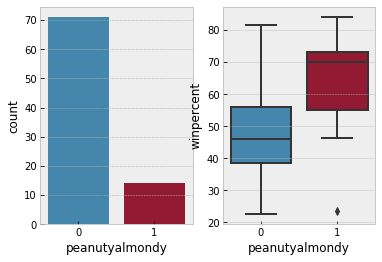

In [22]:
fig, ax =plt.subplots(1,2)
sns.countplot(ddf.peanutyalmondy, ax=ax[0])
sns.boxplot(x='peanutyalmondy',y='winpercent',data=ddf, ax=ax[1])
plt.show()

### The peanut-candy which has a small winning % turns to be Beans so know we know why

In [23]:
ddf[ddf['peanutyalmondy']==1][ddf['winpercent']<30]

C:\Users\7egab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
83,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824


### Okay peanuts are not really essential but in general you can add it to your candy 

In [24]:
ddf[ddf['peanutyalmondy']==0][ddf['winpercent']>70]

C:\Users\7egab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,candy_name,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
2,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
6,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556


# Now let's split the data and implement Logistic Regression 

In [25]:
x=ddf.iloc[:,2:]

In [26]:
y=ddf['chocolate']

### The heatmap shows that sugar percentage has a little correlation to chocolate

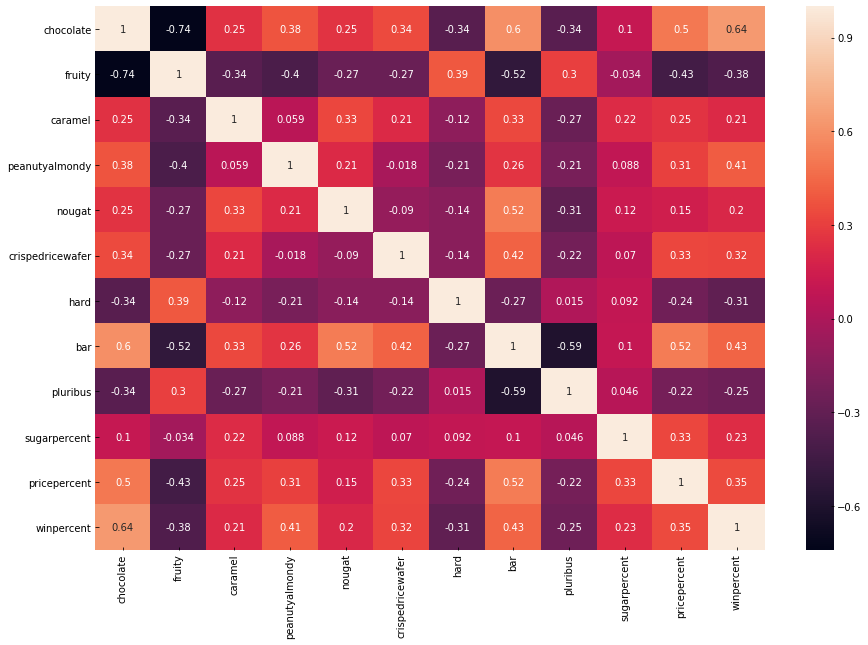

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(ddf.corr(),annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

## So we will drop it

In [28]:
x=x.drop(columns=['sugarpercent'])

## Let's import ExtraTrees to ensure the importance of the features

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
model=ExtraTreesClassifier()

In [31]:
model.fit(x,y)

C:\Users\7egab\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [32]:
model.feature_importances_

array([0.26201928, 0.01953386, 0.09645154, 0.02005817, 0.00492888,
       0.02247564, 0.22842397, 0.03634768, 0.10514312, 0.20461787])

## And to be more sure we will import RFE , too 
### beside Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE


In [34]:
logreg=LogisticRegression(solver='liblinear')
rfe=RFE(logreg,10)

In [35]:
from sklearn.model_selection import train_test_split

### Splitting the data 

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=21)

### Fitting the RFE 

In [37]:
rfe=rfe.fit(x_train,y_train)

### It seems great we won't drop any feature

In [38]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Now let's fit the logreg

In [39]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred=logreg.predict(x_test)

### And we get 90% accuracy ""

In [41]:
logreg.score(x_test,y_test)

0.9090909090909091

In [42]:
from sklearn.metrics import classification_report

## Precision and recall are great

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.90      0.90      0.90        10

    accuracy                           0.91        22
   macro avg       0.91      0.91      0.91        22
weighted avg       0.91      0.91      0.91        22

